# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [22]:
import pandas as pd
df = pd.read_csv('train.csv')
pd.set_option("display.precision", 3)

In [61]:
import matplotlib.pyplot as plt

In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.006,18.0,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
1,2,0.027,0.0,7.07,0,0.469,6.421,78.9,4.967,2,242,17.8,396.90,9.14,21.6
2,4,0.032,0.0,2.18,0,0.458,6.998,45.8,6.062,3,222,18.7,394.63,2.94,33.4
3,5,0.069,0.0,2.18,0,0.458,7.147,54.2,6.062,3,222,18.7,396.90,5.33,36.2
4,7,0.088,12.5,7.87,0,0.524,6.012,66.6,5.561,5,311,15.2,395.60,12.43,22.9


In [24]:
# rename the columns
df = df.rename(columns={'crim':'Crime Rate', 'zn':'Large Resi%', 'indus':'Comm Prop%','chas':'By Cha River',
                       'nox':'Nitro Level','rm':'Avg Rooms Per House','age':'Pre-40s Prop%',
                       'dis':'Dist to Employ Centre', 'rad':'Dist to Highway Index','tax':'Prop Tax',
                       'ptratio':'Pupil Teacher Ratio','lstat':'Lower Income Group%','medv':'Median House Px'})

df.head()

,ID,Crime Rate,Large Resi%,Comm Prop%,By Cha River,Nitro Level,Avg Rooms Per House,Pre-40s Prop%,Dist to Employ Centre,Dist to Highway Index,Prop Tax,Pupil Teacher Ratio,black,Lower Income Group%,Median House Px
0,1,0.006,18.0,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
1,2,0.027,0.0,7.07,0,0.469,6.421,78.9,4.967,2,242,17.8,396.90,9.14,21.6
2,4,0.032,0.0,2.18,0,0.458,6.998,45.8,6.062,3,222,18.7,394.63,2.94,33.4
3,5,0.069,0.0,2.18,0,0.458,7.147,54.2,6.062,3,222,18.7,396.90,5.33,36.2
4,7,0.088,12.5,7.87,0,0.524,6.012,66.6,5.561,5,311,15.2,395.60,12.43,22.9


In [27]:
df.describe()

,ID,Crime Rate,Large Resi%,Comm Prop%,By Cha River,Nitro Level,Avg Rooms Per House,Pre-40s Prop%,Dist to Employ Centre,Dist to Highway Index,Prop Tax,Pupil Teacher Ratio,black,Lower Income Group%,Median House Px
count,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000,333.000
mean,250.952,3.360,10.689,11.293,0.060,0.557,6.266,68.226,3.710,9.634,409.279,18.448,359.466,12.515,22.769
std,147.859,7.352,22.675,6.998,0.238,0.115,0.704,28.133,1.981,8.742,170.842,2.152,86.585,7.068,9.173
min,1.000,0.006,0.000,0.740,0.000,0.385,3.561,6.000,1.130,1.000,188.000,12.600,3.500,1.730,5.000
25%,123.000,0.079,0.000,5.130,0.000,0.453,5.884,45.400,2.122,4.000,279.000,17.400,376.730,7.180,17.400
50%,244.000,0.262,0.000,9.900,0.000,0.538,6.202,76.700,3.092,5.000,330.000,19.000,392.050,10.970,21.600
75%,377.000,3.678,12.500,18.100,0.000,0.631,6.595,93.800,5.117,24.000,666.000,20.200,396.240,16.420,25.000
max,506.000,73.534,100.000,27.740,1.000,0.871,8.725,100.000,10.710,24.000,711.000,21.200,396.900,37.970,50.000


In [215]:
# get the mode
df.mode().head(1)

,ID,Crime Rate,Large Resi%,Comm Prop%,By Cha River,Nitro Level,Avg Rooms Per House,Pre-40s Prop%,Dist to Employ Centre,Dist to Highway Index,Prop Tax,Pupil Teacher Ratio,black,Lower Income Group%,Median House Px
0,1,0.015,0.0,18.1,0.0,0.538,6.127,100.0,3.652,24.0,666.0,20.2,396.9,18.13,50.0


In [220]:
# get the range
range = df.max() - df.min()
range


ID                       505.000
Crime Rate                73.528
Large Resi%              100.000
Comm Prop%                27.000
By Cha River               1.000
Nitro Level                0.486
Avg Rooms Per House        5.164
Pre-40s Prop%             94.000
Dist to Employ Centre      9.581
Dist to Highway Index     23.000
Prop Tax                 523.000
Pupil Teacher Ratio        8.600
black                    393.400
Lower Income Group%       36.240
Median House Px           45.000
dtype: float64

In [221]:
# FORMULATE A HYPOTHESIS


In [110]:
# split the data by Pupil Teacher Ratio into two sub-datasets
pupil_median = df['Pupil Teacher Ratio'].median()
df_pupil_l = df.loc[(df['Pupil Teacher Ratio'] < pupil_median)]
df_pupil_h = df.loc[(df['Pupil Teacher Ratio'] > pupil_median)]

# check data description of lower_pupil_group vs. higher_pupil_group
# which data seem to be different under each group?
df_pupil_l.describe()

# df_pupil_h.describe().loc['mean']

,ID,Crime Rate,Large Resi%,Comm Prop%,By Cha River,Nitro Level,Avg Rooms Per House,Pre-40s Prop%,Dist to Employ Centre,Dist to Highway Index,Prop Tax,Pupil Teacher Ratio,black,Lower Income Group%,Median House Px
count,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000
mean,185.345,0.421,17.912,7.532,0.091,0.511,6.515,58.067,4.341,4.497,307.533,16.677,381.083,9.404,27.020
std,95.208,0.702,27.939,5.618,0.288,0.112,0.718,27.030,1.951,1.699,68.329,1.664,37.783,5.383,8.805
min,1.000,0.006,0.000,0.740,0.000,0.385,4.926,6.000,1.322,1.000,193.000,12.600,88.630,1.730,13.100
25%,97.000,0.054,0.000,3.410,0.000,0.437,6.021,33.300,2.759,3.000,256.000,15.200,384.070,5.500,21.200
50%,188.000,0.103,0.000,6.090,0.000,0.488,6.383,58.700,3.945,5.000,300.000,17.400,392.780,8.580,24.000
75%,266.000,0.408,28.000,10.010,0.000,0.544,6.968,82.600,5.732,5.000,370.000,17.900,395.930,11.500,32.000
max,353.000,3.321,100.000,19.580,1.000,0.871,8.725,100.000,10.710,8.000,432.000,18.900,396.900,29.550,50.000


In [111]:
df_pupil_h.describe()
# looking at mean, 25, 50, 75 quantile, 'Crime Rate','Prop Tax','Lower Income Group%','Median House Px' seems
# interesting data columns to look at

,ID,Crime Rate,Large Resi%,Comm Prop%,By Cha River,Nitro Level,Avg Rooms Per House,Pre-40s Prop%,Dist to Employ Centre,Dist to Highway Index,Prop Tax,Pupil Teacher Ratio,black,Lower Income Group%,Median House Px
count,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000,165.000
mean,319.624,6.360,3.206,15.172,0.030,0.606,6.012,78.714,3.048,14.873,513.358,20.209,337.214,15.733,18.478
std,159.994,9.539,12.152,6.120,0.172,0.097,0.599,25.435,1.801,9.853,181.114,0.569,112.953,7.166,7.480
min,14.000,0.014,0.000,1.250,0.000,0.410,3.561,6.200,1.130,1.000,188.000,19.100,3.500,2.960,5.000
25%,137.000,0.195,0.000,8.560,0.000,0.538,5.794,70.600,1.850,4.000,307.000,20.200,359.290,10.260,13.800
50%,378.000,3.693,0.000,18.100,0.000,0.609,6.072,89.900,2.368,24.000,666.000,20.200,390.180,14.800,18.400
75%,449.000,9.187,0.000,18.100,0.000,0.693,6.398,97.100,3.796,24.000,666.000,20.200,396.900,19.690,21.800
max,506.000,73.534,80.000,27.740,1.000,0.770,8.259,100.000,8.907,24.000,711.000,21.200,396.900,37.970,50.000


In [121]:
df_pupil_l[['Crime Rate','Prop Tax','Lower Income Group%','Median House Px']].describe()

,Crime Rate,Prop Tax,Lower Income Group%,Median House Px
count,165.000,165.000,165.000,165.000
mean,0.421,307.533,9.404,27.020
std,0.702,68.329,5.383,8.805
min,0.006,193.000,1.730,13.100
25%,0.054,256.000,5.500,21.200
50%,0.103,300.000,8.580,24.000
75%,0.408,370.000,11.500,32.000
max,3.321,432.000,29.550,50.000


In [122]:
df_pupil_h[['Crime Rate','Prop Tax','Lower Income Group%','Median House Px']].describe()

,Crime Rate,Prop Tax,Lower Income Group%,Median House Px
count,165.000,165.000,165.000,165.000
mean,6.360,513.358,15.733,18.478
std,9.539,181.114,7.166,7.480
min,0.014,188.000,2.960,5.000
25%,0.195,307.000,10.260,13.800
50%,3.693,666.000,14.800,18.400
75%,9.187,666.000,19.690,21.800
max,73.534,711.000,37.970,50.000


Text(0.5, 1.0, 'higher pupil ratio - Median House Px histogram')

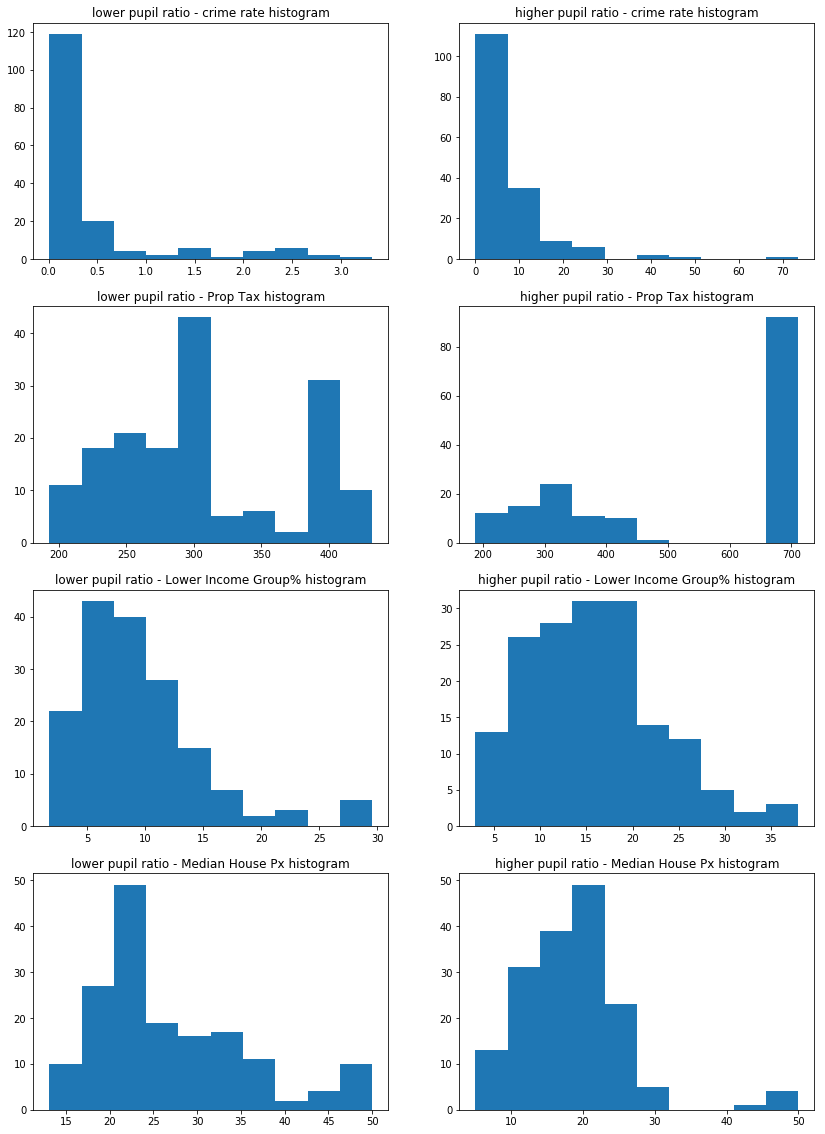

In [128]:
plt.figure(figsize=(14,20))
plt.title('Lower Pupil to Teacher ratio towns Vs. Higher Pupil to Teacher')

plt.subplot(4,2,1)
plt.hist(df_pupil_l['Crime Rate'])
plt.title('lower pupil ratio - crime rate histogram')

plt.subplot(4,2,2)
plt.hist(df_pupil_h['Crime Rate'])
plt.title('higher pupil ratio - crime rate histogram')

plt.subplot(4,2,3)
plt.hist(df_pupil_l['Prop Tax'])
plt.title('lower pupil ratio - Prop Tax histogram')

plt.subplot(4,2,4)
plt.hist(df_pupil_h['Prop Tax'])
plt.title('higher pupil ratio - Prop Tax histogram')

plt.subplot(4,2,5)
plt.hist(df_pupil_l['Lower Income Group%'])
plt.title('lower pupil ratio - Lower Income Group% histogram')

plt.subplot(4,2,6)
plt.hist(df_pupil_h['Lower Income Group%'])
plt.title('higher pupil ratio - Lower Income Group% histogram')

plt.subplot(4,2,7)
plt.hist(df_pupil_l['Median House Px'])
plt.title('lower pupil ratio - Median House Px histogram')

plt.subplot(4,2,8)
plt.hist(df_pupil_h['Median House Px'])
plt.title('higher pupil ratio - Median House Px histogram')

In [145]:
plt.ylim()

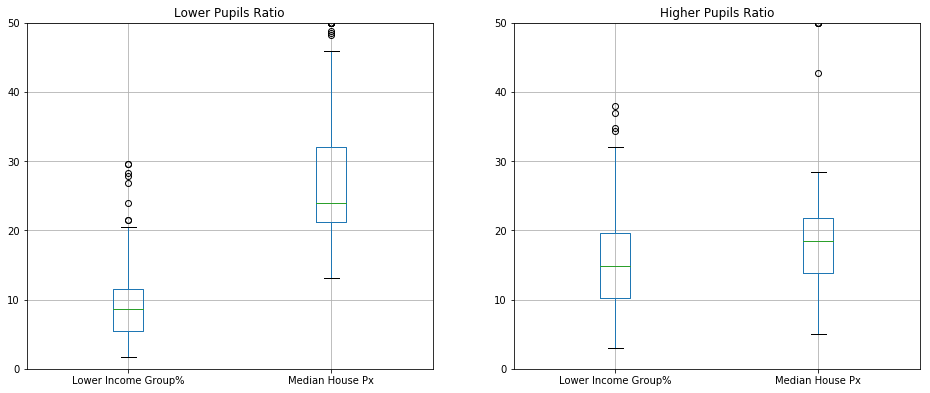

In [151]:
plt.figure(figsize=(16,14))
plt.title('Lower Pupil to Teacher ratio towns Vs. Higher Pupil to Teacher')

plt.subplot(2,2,1)
plt.title('Lower Pupils Ratio')
plt.ylim(bottom=0,top=50)
df_pupil_l[['Lower Income Group%','Median House Px']].boxplot()

plt.subplot(2,2,2)
plt.title('Higher Pupils Ratio')
plt.ylim(0,50)
df_pupil_h[['Lower Income Group%','Median House Px']].boxplot()

# conclusion - the subset of towns containing lower pupils to teacher (i.e. more teachers employed) in general have \
# less low income groups, and higher house price
# BUT the relationship with Property Tax is not expected, i.e. towns with higher pupils to teacher ratio 
# i.e. less teachers, have higher property tax

In [57]:
df_pupil_h.describe().loc['mean']

ID                       319.624
Crime Rate                 6.360
Large Resi%                3.206
Comm Prop%                15.172
By Cha River               0.030
Nitro Level                0.606
Avg Rooms Per House        6.012
Pre-40s Prop%             78.714
Dist to Employ Centre      3.048
Dist to Highway Index     14.873
Prop Tax                 513.358
Pupil Teacher Ratio       20.209
black                    337.214
Lower Income Group%       15.733
Median House Px           18.478
Name: mean, dtype: float64

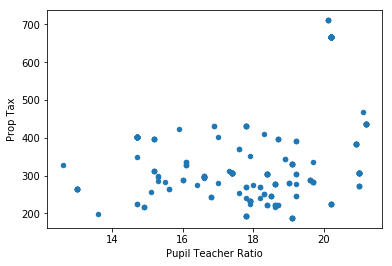

In [156]:
df.plot.scatter(x='Pupil Teacher Ratio', y='Prop Tax')

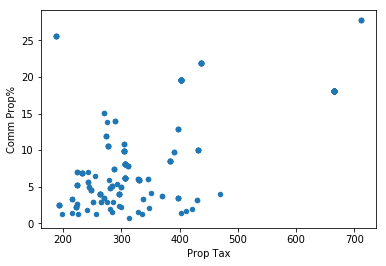

In [196]:
df.plot.scatter(x='Prop Tax', y='Comm Prop%')

In [169]:
print(df['Prop Tax'].value_counts().shape)
# Prop Tax is not a continus data set, it only contains 59 unqiue values

df[df['Prop Tax'] > 600].shape

(59,)


(92, 15)

In [172]:
df[df['Prop Tax'] == 666].head(5)


,ID,Crime Rate,Large Resi%,Comm Prop%,By Cha River,Nitro Level,Avg Rooms Per House,Pre-40s Prop%,Dist to Employ Centre,Dist to Highway Index,Prop Tax,Pupil Teacher Ratio,black,Lower Income Group%,Median House Px
234,357,8.983,0.0,18.1,1,0.77,6.212,97.4,2.122,24,666,20.2,377.73,17.60,17.8
235,358,3.850,0.0,18.1,1,0.77,6.395,91.0,2.505,24,666,20.2,391.34,13.27,21.7
236,359,5.202,0.0,18.1,1,0.77,6.127,83.4,2.723,24,666,20.2,395.43,11.48,22.7
237,360,4.261,0.0,18.1,0,0.77,6.112,81.3,2.509,24,666,20.2,390.74,12.67,22.6
238,361,4.542,0.0,18.1,0,0.77,6.398,88.0,2.518,24,666,20.2,374.56,7.79,25.0


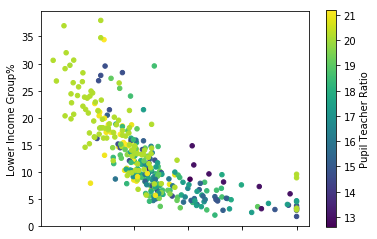

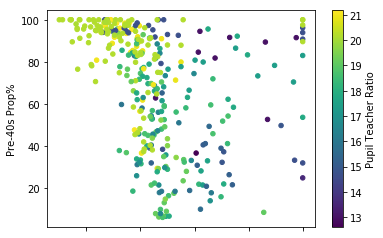

In [194]:

# ANOTHER SECTION TO LOOK FOR INSIGHTS

# expect lower income group % to be negatively correlated with median house price
graph_a = df.plot.scatter(x='Median House Px', y='Lower Income Group%',
               c = 'Pupil Teacher Ratio', colormap = 'viridis')

graph_a.set_aspect('equal')


# what areas offer best-value for schools
# expect lower income group % to be negatively correlated with median house price
graph_b = df.plot.scatter(x='Median House Px', y='Pre-40s Prop%',
               c = 'Pupil Teacher Ratio', colormap = 'viridis')

# graph_b.set_aspect('equal')

In [187]:
df.plot.scatter?


In [133]:
df.corr()

,ID,Crime Rate,Large Resi%,Comm Prop%,By Cha River,Nitro Level,Avg Rooms Per House,Pre-40s Prop%,Dist to Employ Centre,Dist to Highway Index,Prop Tax,Pupil Teacher Ratio,black,Lower Income Group%,Median House Px
ID,1.000,0.456,-0.156,0.422,0.008,0.440,-0.113,0.257,-0.356,0.708,0.686,0.310,-0.272,0.282,-0.222
Crime Rate,0.456,1.000,-0.211,0.422,-0.041,0.463,-0.310,0.379,-0.397,0.667,0.617,0.313,-0.476,0.532,-0.407
Large Resi%,-0.156,-0.211,1.000,-0.519,-0.024,-0.502,0.328,-0.545,0.637,-0.304,-0.311,-0.380,0.168,-0.388,0.345
Comm Prop%,0.422,0.422,-0.519,1.000,0.037,0.750,-0.440,0.638,-0.702,0.570,0.708,0.391,-0.335,0.614,-0.474
By Cha River,0.008,-0.041,-0.024,0.037,1.000,0.080,0.112,0.068,-0.082,0.008,-0.022,-0.125,0.062,-0.050,0.204
Nitro Level,0.440,0.463,-0.502,0.750,0.080,1.000,-0.339,0.736,-0.769,0.612,0.671,0.193,-0.369,0.599,-0.413
Avg Rooms Per House,-0.113,-0.310,0.328,-0.440,0.112,-0.339,1.000,-0.249,0.269,-0.273,-0.357,-0.367,0.155,-0.616,0.690
Pre-40s Prop%,0.257,0.379,-0.545,0.638,0.068,0.736,-0.249,1.000,-0.764,0.447,0.512,0.259,-0.268,0.589,-0.359
Dist to Employ Centre,-0.356,-0.397,0.637,-0.702,-0.082,-0.769,0.269,-0.764,1.000,-0.478,-0.530,-0.231,0.284,-0.506,0.249
Dist to Highway Index,0.708,0.667,-0.304,0.570,0.008,0.612,-0.273,0.447,-0.478,1.000,0.904,0.471,-0.406,0.485,-0.352


In [223]:
# LIVE CODE CLASS ---------------------------->>>>>>>>>>>

# OUR HYPOTHESIS: propertyies in high-crime rate areas will be cheaper than non-high-crime rate areas

df_class1 = df[['Crime Rate','Median House Px']]

df_class1.head()

,Crime Rate,Median House Px
0,0.006,24.0
1,0.027,21.6
2,0.032,33.4
3,0.069,36.2
4,0.088,22.9


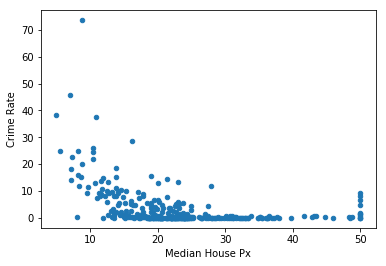

In [225]:
df_class1.plot.scatter('Median House Px','Crime Rate')


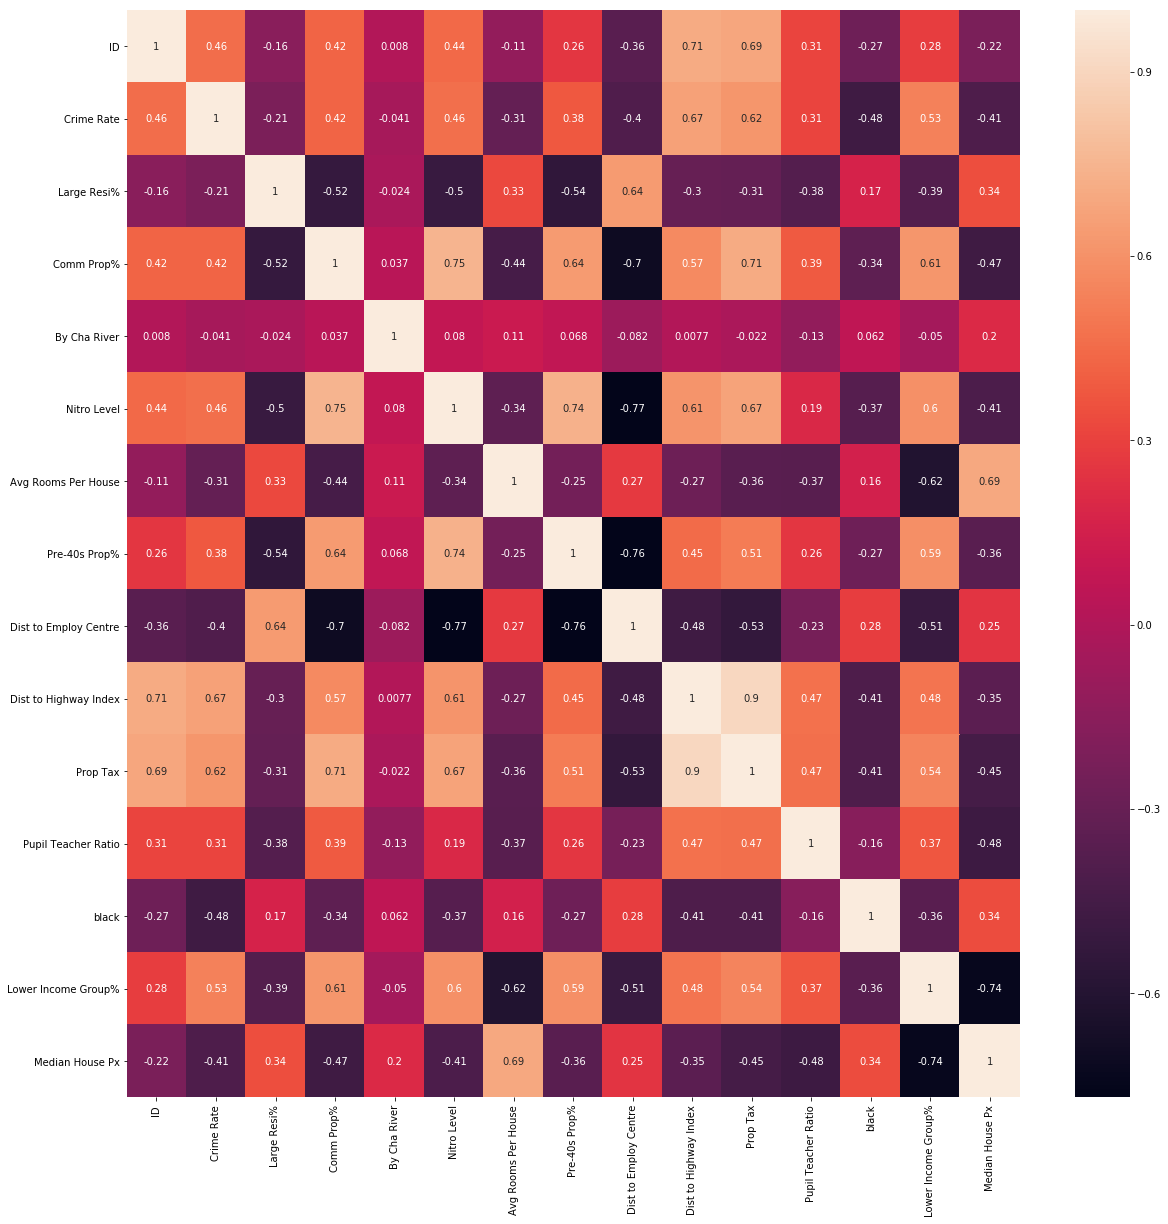

In [232]:
import seaborn as sns

df_corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot = True)

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!